# Examine Individual MODIS images

In [18]:
# imports
import h5py
import os
import numpy as np

import pandas
import seaborn as sns

#
from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# Load coefficients

In [13]:
st_coeff_file = os.path.join(os.getenv('OS_SST'), 'MODIS_L2', 'Scattering',
                             'MODIS_2009_ST_coeff.h5')
f = h5py.File(st_coeff_file, 'r')

## Calculate

In [20]:
S1_iso = f['S1'][:].mean(-1)

In [37]:
#for J in range(5):
#    df_coeff[f's1_{J}'] = S1_iso[:,J]

In [32]:
S2 = f['S2'][:]
J=5
L=4
S2_iso = np.zeros((S2.shape[0],J,J,L))
for l1 in range(L):
    for l2 in range(L):
        S2_iso [:,:,:,(l2-l1)%L] += S2 [:,:,:,l1,l2]
S2_iso  /= L

In [33]:
s21 = S2_iso.mean(-1) / S1_iso[:,:,None]
s22 = S2_iso[:,:,:,0] / S2_iso[:,:,:,L//2]

In [51]:
avg_s21 = np.nanmean(s21, axis=(-1,-2))
avg_s22 = np.nanmean(s22, axis=(-1,-2))

# Load images

In [14]:
preproc_file = os.path.join(
        os.getenv('OS_SST'), 'MODIS_L2', 'PreProc', 
        'MODIS_R2019_2009_95clear_128x128_preproc_std.h5')
f_imgs = h5py.File(preproc_file, 'r')

# Load up the Table

In [5]:
#tbl_file = os.path.join(os.getenv('OS_SST'), 'MODIS_L2', 'Tables', 'MODIS_L2_std.parquet')
tbl_file = os.path.join(os.getenv('OS_SST'), 'MODIS_L2', 'Nenya', 'Tables', 'MODIS_SSL_96clear_v4_DT1.parquet')
modis_dt1 = ulmo_io.load_main_table(tbl_file)

Read main table: /home/xavier/Projects/Oceanography/SST/MODIS_L2/Nenya/Tables/MODIS_SSL_96clear_v4_DT1.parquet


In [7]:
modis_dt1.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,...,merid_slope,zonal_slope_err,merid_slope_err,ulmo_pp_type,DT40,ulmo_pp_idx,ulmo_pp_file,US0,US1,DT
0,13.980967,62.675774,517,2003-03-10 21:25:00,520.178711,304,0.000000,26.199476,25.250000,26.885000,...,-2.126147,0.137467,0.224244,0,0.577624,0,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,0.994515,-1.162040,0.660000
3,-11.910899,129.427200,485,2003-10-11 16:40:00,282.105896,1040,0.011414,28.777988,27.719999,30.639999,...,-1.593005,0.141151,0.189891,0,0.583875,5,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,7.288438,-1.029284,0.799999
4,-20.774708,-37.858100,805,2003-09-21 03:55:00,283.446045,1488,0.025513,23.811947,22.709999,25.090000,...,-0.909913,0.099380,0.306343,0,0.537749,6,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,7.731178,0.076349,0.689999
5,-29.013840,-123.112976,517,2003-01-04 09:20:00,192.348022,976,0.020508,23.734558,21.215000,24.734999,...,-2.198193,0.081723,0.143971,0,0.776376,7,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,4.959723,1.635765,0.910000
6,11.424337,-19.698378,677,2003-03-21 02:55:00,345.454712,1901,0.022400,23.052279,21.209999,24.504999,...,-1.744191,0.143034,0.202087,0,0.738875,9,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,-0.124575,1.851966,1.215000


In [8]:
modis_dt1.iloc[0].ulmo_pp_file

's3://modis-l2/PreProc/MODIS_R2019_2003_95clear_128x128_preproc_std.h5'

# Cut down the Table (for now)

In [48]:
gd = modis_dt1.ulmo_pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2009_95clear_128x128_preproc_std.h5'
modis_cut = modis_dt1[gd].copy()

In [49]:
modis_cut.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,...,merid_slope,zonal_slope_err,merid_slope_err,ulmo_pp_type,DT40,ulmo_pp_idx,ulmo_pp_file,US0,US1,DT
2274915,-24.868008,12.168278,805,2009-01-01 00:40:00,82.548706,1040,0.012756,19.390739,17.535000,20.789999,...,-1.641738,0.102375,0.153740,0,0.682874,710593,s3://modis-l2/PreProc/MODIS_R2019_2009_95clear...,9.173037,0.691282,1.485001
2420130,-24.582869,12.232359,805,2009-01-01 00:40:00,70.756470,1008,0.036133,19.521858,17.490000,20.789999,...,-1.641703,0.112632,0.166426,0,0.783875,383107,s3://modis-l2/PreProc/MODIS_R2019_2009_95clear...,9.135323,0.741989,1.410000
2491896,-25.346592,11.364262,741,2009-01-01 00:40:00,98.257690,1104,0.025024,19.802391,18.359999,20.914999,...,-1.891910,0.076300,0.292666,0,0.956501,7588,s3://modis-l2/PreProc/MODIS_R2019_2009_95clear...,8.985909,0.984576,1.100000
2524389,-25.016357,11.103628,709,2009-01-01 00:40:00,30.888916,1072,0.022095,19.938133,17.855000,21.059999,...,-1.556116,0.104058,0.099551,0,0.975624,528229,s3://modis-l2/PreProc/MODIS_R2019_2009_95clear...,8.445560,1.050207,1.139999
2546725,-25.154379,12.105114,805,2009-01-01 00:40:00,17.167542,1072,0.027893,19.314190,17.180000,20.789999,...,-1.635058,0.132528,0.177504,0,0.693999,632802,s3://modis-l2/PreProc/MODIS_R2019_2009_95clear...,9.390476,0.710725,1.350000


## Add in the coefficients

In [50]:
s21.shape

(757592, 5, 5)

In [39]:
for J in range(5):
    modis_cut[f's1_{J}'] = S1_iso[modis_cut.pp_idx, J]

In [52]:
modis_cut['s21'] = avg_s21[modis_cut.pp_idx]
modis_cut['s22'] = avg_s22[modis_cut.pp_idx]

# Examine a few

In [53]:
iLL_min = np.argmin(modis_cut.LL)
cutout = modis_cut.iloc[iLL_min]
cutout

lat                                                         -38.35867
lon                                                         55.130726
col                                                               901
datetime                                          2009-08-17 21:45:00
LL                                                       -1475.335449
row                                                               752
clear_fraction                                               0.021729
mean_temperature                                            15.752453
Tmin                                                            9.105
Tmax                                                            16.82
T90                                                             16.49
T10                                                            15.375
filename                         AQUA_MODIS.20090817T214508.L2.SST.nc
UID                                                125051641323513073
pp_file             

In [17]:
img = f_imgs['valid'][cutout.pp_idx,0,...]
img.shape

(64, 64)

<Axes: >

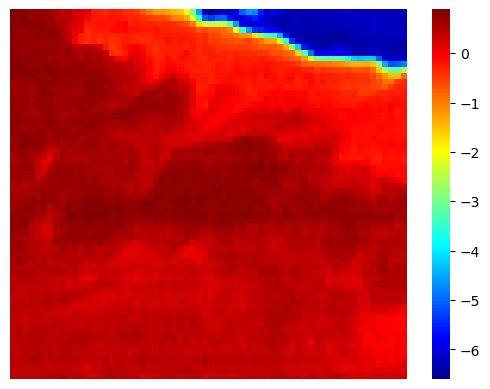

In [19]:
plotting.show_image(img)

# Boring one (highest LL)

In [54]:
iLL_max = np.argmax(modis_cut.LL)
cutout_max = modis_cut.iloc[iLL_max]
cutout_max.LL

822.1823120117188

<Axes: >

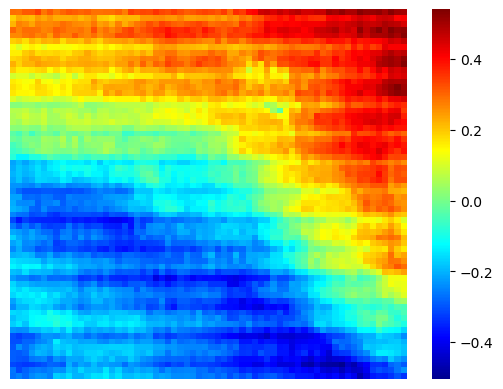

In [55]:
img = f_imgs['valid'][cutout_max.pp_idx,0,...]
plotting.show_image(img)

In [56]:
cutout_max

lat                                                         11.418323
lon                                                        -25.076971
col                                                               773
datetime                                          2009-06-05 03:30:00
LL                                                         822.182312
row                                                              1104
clear_fraction                                                    0.0
mean_temperature                                            25.586514
Tmin                                                        24.949999
Tmax                                                        26.219999
T90                                                         25.939999
T10                                                         25.264999
filename                         AQUA_MODIS.20090605T033007.L2.SST.nc
UID                                               1244101418315492303
pp_file             

# Highest $s_{21}$

In [57]:
ihigh_s21 = np.argmax(modis_cut.s21)
c_high_s21 = modis_cut.iloc[ihigh_s21]
c_high_s21

lat                                                         40.984432
lon                                                         -68.82039
col                                                               933
datetime                                          2009-03-22 07:00:00
LL                                                        -535.192932
row                                                               528
clear_fraction                                               0.021301
mean_temperature                                             4.819343
Tmin                                                            3.975
Tmax                                                           14.565
T90                                                              5.07
T10                                                             4.365
filename                         AQUA_MODIS.20090322T070007.L2.SST.nc
UID                                               1237130984411117961
pp_file             

<Axes: >

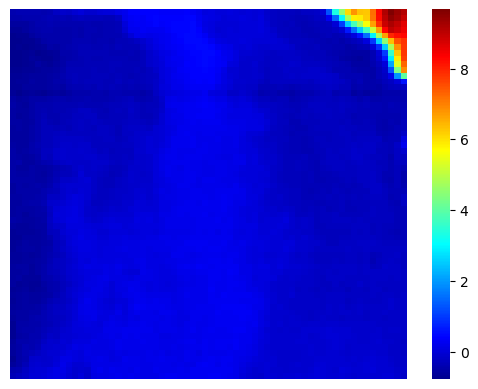

In [58]:
img = f_imgs['valid'][c_high_s21.pp_idx,0,...]
plotting.show_image(img)

# Highest $s_{22}$

In [59]:
ihigh_s22 = np.argmax(modis_cut.s22)
c_high_s22 = modis_cut.iloc[ihigh_s22]
c_high_s22

lat                                                        -39.847977
lon                                                        -58.325397
col                                                               773
datetime                                          2009-10-13 05:10:00
LL                                                         498.057861
row                                                               784
clear_fraction                                                0.00116
mean_temperature                                             9.662296
Tmin                                                             8.57
Tmax                                                           11.465
T90                                                            10.355
T10                                                             9.035
filename                         AQUA_MODIS.20091013T051007.L2.SST.nc
UID                                                125550152012167460
pp_file             

<Axes: >

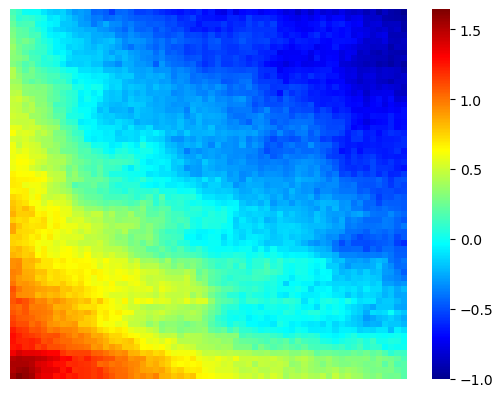

In [60]:
img = f_imgs['valid'][c_high_s22.pp_idx,0,...]
plotting.show_image(img)

# Lowest $s_{22}$

In [61]:
ilow_s22 = np.argmin(modis_cut.s22)
c_low_s22 = modis_cut.iloc[ilow_s22]
c_low_s22

lat                                                        -31.754902
lon                                                         -132.1169
col                                                               357
datetime                                          2009-02-01 09:55:00
LL                                                         -48.674988
row                                                               176
clear_fraction                                                0.03949
mean_temperature                                            22.241764
Tmin                                                           19.475
Tmax                                                           23.545
T90                                                            22.635
T10                                                            21.855
filename                         AQUA_MODIS.20090201T095508.L2.SST.nc
UID                                                 12335824514788310
pp_file             

<Axes: >

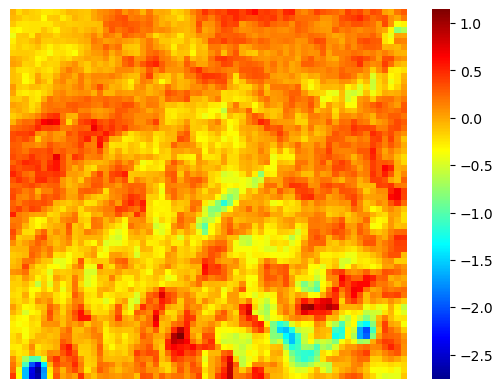

In [62]:
img = f_imgs['valid'][c_low_s22.pp_idx,0,...]
plotting.show_image(img)